# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('factbook_transform.csv')
df.head()

,Unnamed: 0,Country,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,...,Life expectancy at birth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,0,Japan,377835,9.47,170200000000,8.95,971000000000,1044000000000,538800000000,3745000000000,...,81.15,1.0,804200000000,52900000,1274172440,164.3,23705,6646000000000,1.39,4.7
1,1,Germany,357021,8.33,73590000000,10.55,519500000000,560000000000,893300000000,2362000000000,...,78.65,1.5,995500000000,28910000,824313900,65.8,46039,968400000000,1.39,10.6
2,2,Saudi Arabia,1960582,29.56,51500000000,2.62,128500000000,138200000000,113000000000,310200000000,...,75.46,10.0,564000000000,15500000,264175990,75.0,1392,236200000000,4.05,25.0
3,3,Russia,17075200,9.80,46040000000,14.52,894300000000,915000000000,162500000000,1408000000000,...,67.10,0.0,4058000000000,23100000,1434203090,28.2,87157,1245000000000,1.27,8.3
4,4,Switzerland,4129,9.77,40950000000,8.48,54530000000,63470000000,130700000000,251900000000,...,80.39,1.0,30930000000,2904,74893700,57.2,4533,695800000000,1.42,3.4


In [3]:
# Mengambil data GDP, Export, Import, Industrial production growth rate, Investment, dan Unemployment rate
df = df[['GDP', 'Exports', 'Imports', 'Industrial production growth rate', 'Investment', 'Unemployment rate']]
df.head()

,GDP,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate
0,3745000000000,538800000000,401800000000,6.6,24.0,4.7
1,2362000000000,893300000000,716700000000,2.2,17.6,10.6
2,310200000000,113000000000,36210000000,2.8,17.2,25.0
3,1408000000000,162500000000,92910000000,6.4,19.1,8.3
4,251900000000,130700000000,121100000000,4.7,20.4,3.4


In [4]:
df.isnull().sum()

GDP                                  0
Exports                              0
Imports                              0
Industrial production growth rate    0
Investment                           0
Unemployment rate                    0
dtype: int64

In [5]:
# rename kolom
df = df.rename(columns={'GDP': 'Y', 'Exports': 'X1', 'Imports': 'X2', 'Industrial production growth rate': 'X3', 'Investment' : 'X4', 'Unemployment rate': 'X5'})
df

,Y,X1,X2,X3,X4,X5
0,3745000000000,538800000000,401800000000,6.6,24.0,4.7
1,2362000000000,893300000000,716700000000,2.2,17.6,10.6
2,310200000000,113000000000,36210000000,2.8,17.2,25.0
3,1408000000000,162500000000,92910000000,6.4,19.1,8.3
4,251900000000,130700000000,121100000000,4.7,20.4,3.4
...,...,...,...,...,...,...
144,1609000000000,336400000000,329300000000,0.7,19.3,8.6
145,937600000000,172500000000,222000000000,3.0,25.4,10.4
146,1782000000000,347200000000,439400000000,0.9,16.2,4.8
147,611700000000,86890000000,98100000000,1.9,25.3,5.1


In [6]:
# MinMax Scaller dengan rentang 0-100
def scaler(x):
    return (x - x.min()) / (x.max() - x.min()) * 100

for column in df.columns:
    df[column] = scaler(df[column])

df

,Y,X1,X2,X3,X4,X5
0,31.871100,60.315386,27.220201,38.095238,36.866359,6.714286
1,20.100672,100.000000,48.555482,26.455026,27.035330,15.142857
2,2.638227,12.649071,2.450542,28.042328,26.420891,35.714286
3,11.981376,18.190364,6.292112,37.566138,29.339478,11.857143
4,2.142048,14.630503,8.202057,33.068783,31.336406,4.857143
...,...,...,...,...,...,...
144,13.692045,37.657654,22.308140,22.486772,29.646697,12.285714
145,7.977898,19.309817,15.038290,28.571429,39.016897,14.857143
146,15.164412,38.866663,29.767697,23.015873,24.884793,6.857143
147,5.204231,9.726178,6.643748,25.661376,38.863287,7.285714


# Model Regressi Linear

## Membuat persamaan normal menggunakan nilai zigma

In [7]:
# Hitung zigma setiap kolom
column_names = ['X1', 'X2', 'X3', 'X4', 'X5','Y']
zigma_values = {}

for column in column_names:
    zigma_values[column] = df[column].sum()

zigma_values

{'X1': 977.1731266763111,
 'X2': 589.8722593242766,
 'X3': 5288.888888888889,
 'X4': 4810.4454685099845,
 'X5': 2625.2857142857147,
 'Y': 469.99296838257305}

In [8]:
# Hitung zigma kuadrat setiap kolom
column_names = ['X1', 'X2', 'X3', 'X4', 'X5','Y']
zigma_squared_values = {}

for column in column_names:
    zigma_squared_values[column] = (df[column] ** 2).sum()

zigma_squared_values

{'X1': 39821.64173271906,
 'X2': 19380.026915542134,
 'X3': 219407.21144424853,
 'X4': 182949.7806753642,
 'X5': 96242.30612244898,
 'Y': 17606.97504266749}

In [9]:
# Hitung zigma setiap kolom dikali kolom lain
column_names = ['X1', 'X2', 'X3', 'X4', 'X5']
zigma_multiply_values = {}

for i in range(len(column_names)):
    for j in range(i+1, len(column_names)):
        column_1 = column_names[i]
        column_2 = column_names[j]
        zigma_multiply_values[column_1 + '_' + column_2] = (df[column_1] * df[column_2]).sum()

zigma_multiply_values

{'X1_X2': 25953.00146464189,
 'X1_X3': 34018.94994302863,
 'X1_X4': 32660.556559644567,
 'X1_X5': 11164.042171655316,
 'X2_X3': 20336.387156278495,
 'X2_X4': 19373.28609246052,
 'X2_X5': 6506.713204286646,
 'X3_X4': 176539.3493120068,
 'X3_X5': 94359.41043083901,
 'X4_X5': 84354.35593592277}

In [10]:
# Hitung zigma setiap kolom dikali Y
column_names = ['X1', 'X2', 'X3', 'X4', 'X5']
zigma_multiply_y_values = {}

for column in column_names:
    zigma_multiply_y_values[column + '_Y'] = (df[column] * df['Y']).sum()

zigma_multiply_y_values

{'X1_Y': 21068.877649082177,
 'X2_Y': 16666.246787662265,
 'X3_Y': 18069.522323494268,
 'X4_Y': 16591.85263095826,
 'X5_Y': 5625.304345360601}

In [11]:
# Matriks koefisien
A = np.array([[len(df), zigma_values['X1'], zigma_values['X2'], zigma_values['X3'], zigma_values['X4'], zigma_values['X5']],
              [zigma_values['X1'], zigma_squared_values['X1'], zigma_multiply_values['X1_X2'], zigma_multiply_values['X1_X3'], zigma_multiply_values['X1_X4'], zigma_multiply_values['X1_X5']],
              [zigma_values['X2'], zigma_multiply_values['X1_X2'], zigma_squared_values['X2'], zigma_multiply_values['X2_X3'], zigma_multiply_values['X2_X4'], zigma_multiply_values['X2_X5']],
              [zigma_values['X3'], zigma_multiply_values['X1_X3'], zigma_multiply_values['X2_X3'], zigma_squared_values['X3'], zigma_multiply_values['X3_X4'], zigma_multiply_values['X3_X5']],
              [zigma_values['X4'], zigma_multiply_values['X1_X4'], zigma_multiply_values['X2_X4'], zigma_multiply_values['X3_X4'], zigma_squared_values['X4'], zigma_multiply_values['X4_X5']],
              [zigma_values['X5'], zigma_multiply_values['X1_X5'], zigma_multiply_values['X2_X5'], zigma_multiply_values['X3_X5'], zigma_multiply_values['X4_X5'], zigma_squared_values['X5']]])
# Vektor hasil
B = np.array([zigma_values['Y'], zigma_multiply_y_values['X1_Y'], zigma_multiply_y_values['X2_Y'], zigma_multiply_y_values['X3_Y'], zigma_multiply_y_values['X4_Y'], zigma_multiply_y_values['X5_Y']])

# Menyelesaikan sistem persamaan linear
x = np.linalg.solve(A, B)

# Membuat dataframe baru dengan nilai koefisien
df_coef = pd.DataFrame(x, index=['b0', 'b1', 'b2', 'b3', 'b4', 'b5'], columns=['Koefisien'])
df_coef

,Koefisien
b0,-3.174322
b1,-0.253982
b2,1.200869
b3,0.054361
b4,0.035958
b5,0.008498


In [12]:
# Membuat fungsi regresi linear
def regresi_linear(x1, x2, x3, x4, x5):
    return x[0] + x[1]*x1 + x[2]*x2 + x[3]*x3 + x[4]*x4 + x[5]*x5

## Membuat persamaan normal menggunakan matriks

Y = XB + e

Dimana
Y = [y1, y2, y3, ..., yn]
X = [[1, x11, x12, x13, ..., x1k],
     [1, x21, x22, x23, ..., x2k],
     [1, x31, x32, x33, ..., x3k],
     ...
     [1, xn1, xn2, xn3, ..., xnk]]
B = [b0, b1, b2, b3, ..., bk]

In [13]:
# Membuat matriks Y
Y = np.array(df['Y'])

# Membuat matriks X
X = np.array([[1, df['X1'][i], df['X2'][i], df['X3'][i], df['X4'][i], df['X5'][i]] for i in range(len(df))])

Jika matriks X^T^X mempunyai invers, maka nilai b dapat ditulis menjadi
b = (X^T^X)^-1^ X^T^Y

In [14]:
# Menghitung nilai b
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
df_coef = pd.DataFrame(b, index=['b0', 'b1', 'b2', 'b3', 'b4', 'b5'], columns=['Koefisien'])
df_coef

,Koefisien
b0,-3.174322
b1,-0.253982
b2,1.200869
b3,0.054361
b4,0.035958
b5,0.008498


In [15]:
# Menghitung nilai g
g = X.T.dot(Y)
g

array([  469.99296838, 21068.87764908, 16666.24678766, 18069.52232349,
       16591.85263096,  5625.30434536])

## Pemilihan model

**Ukuran yang dapat menjadi patokan bahwa model regresi yang dibangun sudah baik adalah:**
1. Koefisien Determinasi (R^2^): R^2^ menggambarkan proporsi variasi dalam variabel dependen yang dapat dijelaskan oleh variabel independen dalam model regresi. Semakin tinggi nilai R^2^, semakin baik model regresi dalam menjelaskan variasi dalam data. Nilai R^2^ berkisar antara 0 hingga 1, di mana nilai 1 menunjukkan model yang sempurna cocok dengan data.

2. Uji Signifikansi Model: Uji signifikansi model (misalnya, uji F) digunakan untuk menguji apakah model regresi secara keseluruhan memiliki pengaruh yang signifikan terhadap variabel dependen. Jika nilai p-value dari uji tersebut cukup rendah (biasanya kurang dari 0,05), maka kita dapat menyimpulkan bahwa model secara signifikan mempengaruhi variabel dependen.

3. Evaluasi Residual: Melihat residual (galat) dari model juga penting. Residual adalah selisih antara nilai yang diamati dan nilai yang diprediksi oleh model. Dalam model yang baik, residual seharusnya tersebar secara acak dan tidak memiliki pola tertentu. Jika ada pola yang tersisa dalam residual, itu bisa menunjukkan adanya struktur yang tidak tercakup oleh model.

JKT = sigma (y[i]^2^) - (sigma (y[i]))^2^ / n
JKR = sigma (b[j] * g[j]) - (sigma (y[i]))^2^ / n


In [16]:
# Menghitung JKT
JKT = 0
for i in range(len(Y)):
    JKT += Y[i]**2
JKT = JKT - (zigma_values['Y'])**2 / len(Y)
JKT

16124.469067304657

In [17]:
# Menghitung JKR
JKR = 0
for i in range(len(b)):
    JKR += b[i] * g[i]
JKR = JKR - (zigma_values['Y'])**2 / len(Y)
JKR

13315.129376087645

**Koefisien determinasi darab**
R^2^ = JKR / JKT

In [18]:
# Menghitung koefisien determinasi darab (R^2)
R2 = JKR / JKT
R2

0.8257716468374473

Artinya 82,58% variasi dari variabel dependen (Y) dapat dijelaskan oleh variabel independen (X1, X2, X3, X4, X5) dalam model regresi linear berganda.

**Pemilihan peubah bebas yang masuk ke dalam model dapat dilakukan melalui beberapa pendekatan:**

1. Pendekatan Pemilihan Maju (Forward Selection): Dimulai dengan model yang hanya termasuk satu peubah bebas, dan secara bertahap menambahkan peubah bebas yang memiliki pengaruh yang signifikan berdasarkan uji statistik. Proses ini berlanjut dengan menambahkan peubah satu per satu hingga tidak ada peubah bebas lain yang signifikan yang dapat ditambahkan.

2. Pendekatan Penyisihan Mundur (Backward Elimination): Dimulai dengan model yang termasuk semua peubah bebas yang relevan, kemudian secara bertahap menghapus peubah yang memiliki pengaruh yang tidak signifikan berdasarkan uji statistik (misalnya, uji t). Peubah yang memiliki kontribusi yang paling rendah atau tidak signifikan secara statistik dapat dihapus dari model satu per satu hingga hanya tersisa peubah yang signifikan.

3. Pendekatan Regresi Bertahap (Stepwise Regression): Menggabungkan pendekatan penyisihan mundur dan pemilihan maju, di mana peubah bebas ditambahkan atau dihapus berdasarkan kriteria statistik seperti nilai p-value atau peningkatan R^2^. Pendekatan ini memungkinkan penambahan dan penghapusan peubah bebas secara iteratif untuk mencapai model yang lebih baik.

## Metode pemilihan maju


Peubah bebas dimasukkan satu demi satu sampai persamaan regresi yang memuaskan ditemukan. Peubah bebas yang dimasukkan adalah peubah bebas yang memiliki nilai paling tinggi dari uji t. Peubah bebas yang memiliki nilai paling tinggi dari uji t adalah peubah bebas yang memiliki pengaruh yang paling signifikan terhadap variabel dependen.

In [19]:
# Langkah 1: Pilih peubah yang memberikan R^2^ terbesar
R2_1 = []

for var in ['X1', 'X2', 'X3', 'X4', 'X5']:
    X = np.array([[1, df[var][i]] for i in range(len(df))])
    b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    g = X.T.dot(Y)

    JKR = 0
    for i in range(len(b)):
        JKR += b[i] * g[i]
    JKR = JKR - (np.sum(Y)**2) / len(Y)

    R2_1.append(JKR)

# Konversikan ke dataframe
df_R2 = pd.DataFrame(R2_1, index=['X1', 'X2', 'X3', 'X4', 'X5'], columns=['R^2'])
df_R2

,R^2
X1,9682.315933
X2,12860.575826
X3,60.711477
X4,72.752881
X5,141.090408


In [20]:
# Mengambil nilai R^2^ terbesar
df_R2[df_R2['R^2'] == df_R2['R^2'].max()]

,R^2
X2,12860.575826


Kita mendapatkan bahwa peubah bebas yang memiliki R^2^ terbesar adalah X2.

In [21]:
# Langkah 2: Pilih peubah yang memberikan peningkatan R^2^ terbesar bersama dengan peubah yang telah dipilih sebelumnya
R2_2 = []

for var in ['X1', 'X3', 'X4', 'X5']:
    X = np.array([[1, df['X2'][i], df[var][i]] for i in range(len(df))])
    b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    g = X.T.dot(Y)

    JKR = 0
    for i in range(len(b)):
        JKR += b[i] * g[i]
    JKR = JKR - (np.sum(Y)**2) / len(Y)

    R2_2.append((JKR) - R2_1[1])

# Konversikan ke dataframe
df_R2 = pd.DataFrame(R2_2, index=['X1_2', 'X3_2', 'X4_2', 'X5_2'], columns=['R^2'])
df_R2

,R^2
X1_2,298.408107
X3_2,115.173818
X4_2,46.372963
X5_2,10.564431


In [22]:
# Mengambil nilai R^2^ terbesar
df_R2[df_R2['R^2'] == df_R2['R^2'].max()]

,R^2
X1_2,298.408107


Kita mendapatkan bahwa peubah bebas yang memiliki peningkatan R^2^ terbesar adalah X1_2.

In [23]:
# Mencari nilai s^2 (rataan kuadrat galat untuk model yang memuat X1_2)
X = np.array([[1, df['X2'][i], df['X1'][i]] for i in range(len(df))])
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
g = X.T.dot(Y)

JKT = 0
for i in range(len(Y)):
    JKT += Y[i]**2
JKT = JKT - (np.sum(Y)**2) / len(Y)

JKR = 0
for i in range(len(b)):
    JKR += b[i] * g[i]
JKR = JKR - (np.sum(Y)**2) / len(Y)

JKG = JKT - JKR
s2 = JKG / (len(Y) - 3)
s2

20.311542017341807

In [24]:
# Membandingan dengan nilai f tabel
f_hitung = R2_2[0] / s2
f_tabel = stats.f.isf(0.05, 1, len(Y) - 3)

if f_hitung > f_tabel:
    print('f_hitung =', f_hitung, '>', 'f_tabel =', f_tabel)
    print('Maka, X1_2 masuk ke dalam model')
else:
    print('f_hitung =', f_hitung, '<', 'f_tabel =', f_tabel)
    print('Maka, X1_2 tidak masuk ke dalam model')

f_hitung = 14.691553546807139 > f_tabel = 3.905942146431825
Maka, X1_2 masuk ke dalam model


In [25]:
# Langkah 3: Pilih peubah yang memberikan peningkatan R^2^ terbesar bersama dengan peubah yang telah dipilih sebelumnya

R2_3 = []
for var in ['X3', 'X4', 'X5']:
    X = np.array([[1, df['X2'][i], df['X1'][i], df[var][i]] for i in range(len(df))])
    b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    g = X.T.dot(Y)

    JKR = 0
    for i in range(len(b)):
        JKR += b[i] * g[i]
    JKR = JKR - (np.sum(Y)**2) / len(Y)

    R2_3.append((JKR) - (R2_1[1] + R2_2[0]))

# Konversikan ke dataframe
df_R2 = pd.DataFrame(R2_3, index=['X3_12', 'X4_12', 'X5_12'], columns=['R^2'])
df_R2

,R^2
X3_12,118.604284
X4_12,61.663052
X5_12,4.451365


In [26]:
# Mengambil nilai R^2^ terbesar
df_R2[df_R2['R^2'] == df_R2['R^2'].max()]

,R^2
X3_12,118.604284


Kita mendapatkan bahwa peubah bebas yang memiliki peningkatan R^2^ terbesar adalah X3_12.

In [27]:
# Mencari nilai s^2 (rataan kuadrat galat untuk model yang memuat X1_2 dan X3_3)
X = np.array([[1, df['X2'][i], df['X1'][i], df['X3'][i]] for i in range(len(df))])
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
g = X.T.dot(Y)

JKT = 0
for i in range(len(Y)):
    JKT += Y[i]**2
JKT = JKT - (np.sum(Y)**2) / len(Y)

JKR = 0
for i in range(len(b)):
    JKR += b[i] * g[i]
JKR = JKR - (np.sum(Y)**2) / len(Y)

JKG = JKT - JKR
s2 = JKG / (len(Y) - 4)
s2

19.63366103592121

In [28]:
# Membandingkan dengan nilai f tabel
f_hitung = R2_3[0] / s2
f_tabel = stats.f.isf(0.05, 1, len(Y) - 4)

if f_hitung > f_tabel:
    print('f_hitung =', f_hitung, '>', 'f_tabel =', f_tabel)
    print('Maka, X3_12 masuk ke dalam model')
else:
    print('f_hitung =', f_hitung, '<', 'f_tabel =', f_tabel)
    print('Maka, X3_12 tidak masuk ke dalam model')


f_hitung = 6.040864416795876 > f_tabel = 3.9063924027231307
Maka, X3_12 masuk ke dalam model


In [29]:
# Langkah 4: Pilih peubah yang memberikan peningkatan R^2^ terbesar bersama dengan peubah yang telah dipilih sebelumnya

R2_4 = []
for var in ['X4', 'X5']:
    X = np.array([[1, df['X2'][i], df['X1'][i], df['X3'][i], df[var][i]] for i in range(len(df))])
    b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    g = X.T.dot(Y)

    JKT = 0
    for i in range(len(Y)):
        JKT += Y[i]**2
    JKT = JKT - (np.sum(Y)**2) / len(Y)

    JKR = 0
    for i in range(len(b)):
        JKR += b[i] * g[i]
    JKR = JKR - (np.sum(Y)**2) / len(Y)

    R2_4.append((JKR) - (R2_1[1] + R2_2[0] + R2_3[0]))

# Konversikan ke dataframe
df_R2 = pd.DataFrame(R2_4, index=['X4_123', 'X5_123'], columns=['R^2'])
df_R2

,R^2
X4_123,34.01346
X5_123,3.30221


In [30]:
# Mengambil nilai R^2^ terbesar
df_R2[df_R2['R^2'] == df_R2['R^2'].max()]

,R^2
X4_123,34.01346


Kita mendapatkan bahwa peubah bebas yang memiliki peningkatan R^2^ terbesar adalah X4_123.

In [31]:
# Mencari nilai s^2 (rataan kuadrat galat untuk model yang memuat X1_2, X3_3, dan X4_4)
X = np.array([[1, df['X2'][i], df['X1'][i], df['X3'][i], df['X4'][i]] for i in range(len(df))])
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
g = X.T.dot(Y)

JKT = 0
for i in range(len(Y)):
    JKT += Y[i]**2
JKT = JKT - (np.sum(Y)**2) / len(Y)

JKR = 0
for i in range(len(b)):
    JKR += b[i] * g[i]
JKR = JKR - (np.sum(Y)**2) / len(Y)

JKG = JKT - JKR
s2 = JKG / (len(Y) - 5)
s2

19.53380132226976

In [32]:
# Membandingkan dengan nilai f tabel
f_hitung = R2_4[0] / s2
f_tabel = stats.f.isf(0.05, 1, len(Y) - 5)

if f_hitung > f_tabel:
    print('f_hitung =', f_hitung, '>', 'f_tabel =', f_tabel)
    print('Maka, X4_123 masuk ke dalam model')
else:
    print('f_hitung =', f_hitung, '<', 'f_tabel =', f_tabel)
    print('Maka, X4_123 tidak masuk ke dalam model')

f_hitung = 1.7412616848392328 < f_tabel = 3.9068489908626605
Maka, X4_123 tidak masuk ke dalam model


## Persamaan regresi

Karena nilai f hitung ketika x4 dimasukkan ke dalam model adalah lebih kecil dari f tabel, maka kita akan menggunakan model regresi yang memuat X2, X1_2, dan X3_12 (X2, X1, X3)

In [33]:
# Mencari nilai b
X = np.array([[1, df['X2'][i], df['X1'][i], df['X3'][i]] for i in range(len(df))])
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# Konversikan ke dataframe
df_b = pd.DataFrame(b, index=['b0', 'b1', 'b2', 'b3'], columns=['Koefisien'])
df_b

,Koefisien
b0,-2.107608
b1,1.195752
b2,-0.250806
b3,0.061216


In [34]:
# Menghitung R2
g = X.T.dot(Y)

JKT = 0
for i in range(len(Y)):
    JKT += Y[i]**2
JKT = JKT - (np.sum(Y)**2) / len(Y)

JKR = 0
for i in range(len(b)):
    JKR += b[i] * g[i]
JKR = JKR - (np.sum(Y)**2) / len(Y)

R2 = JKR / JKT
R2

0.8234434362877006

Artinya, terdapat 82.34% variasi Y yang dapat dijelaskan oleh model regresi yang memuat X2, X1_2, dan X3_12 (X2, X1, X3).

## MSE

In [35]:
Y_pred = []
for i in range(len(df)):
    Y_pred.append(b[0] + b[1] * df['X2'][i] + b[2] * df['X1'][i] + b[3] * df['X3'][i])

In [36]:
# Mencari nilai MSE
def MSE(Y, Y_pred):
    return np.sum((Y - Y_pred)**2) / len(Y)

MSE = MSE(Y, Y_pred)
MSE

19.106582887305798

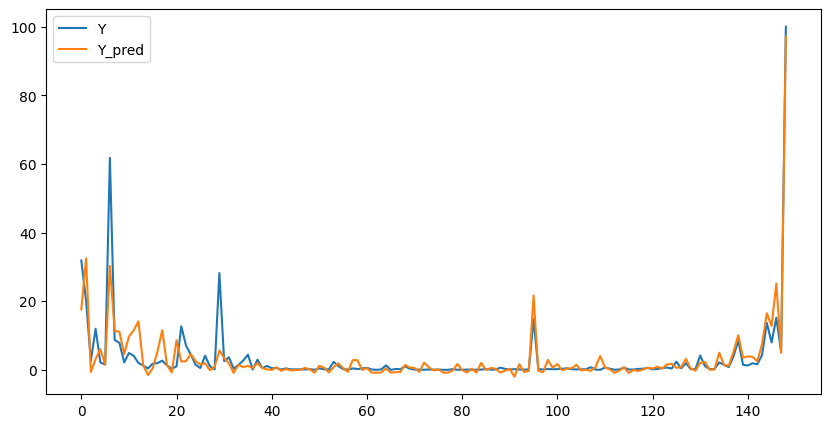

In [37]:
# Membuat plot error MSE
plt.figure(figsize=(10, 5))
plt.plot(Y, label='Y')
plt.plot(Y_pred, label='Y_pred')
plt.legend()